In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [7]:
titanic = pd.read_excel('../titanic.xls')

titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [8]:
titanic.shape

(1309, 14)

In [9]:
titanic.dtypes

pclass         int64
survived       int64
name          object
sex           object
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object

In [10]:
titanic.dtypes.value_counts()

object     7
int64      4
float64    3
dtype: int64

<AxesSubplot:>

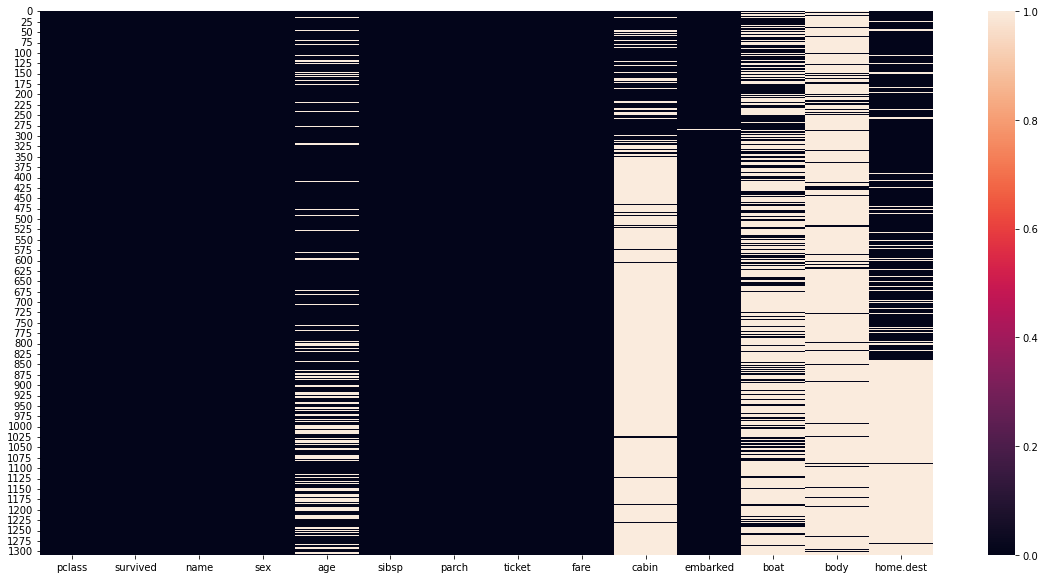

In [12]:
df = titanic.copy()

plt.figure(figsize=(20, 10))
sns.heatmap(df.isna())

<AxesSubplot:ylabel='survived'>

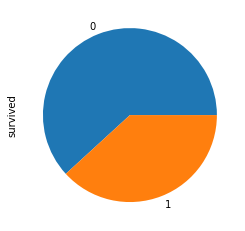

In [15]:
df['survived'].value_counts().plot.pie()

<AxesSubplot:>

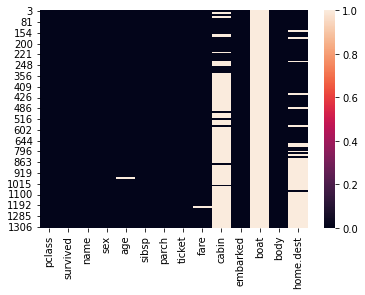

In [19]:
df_survived = df[df['survived'] == 1]
df_died = df[df['survived'] == 0]

df_body = df[~df['body'].isna()]
sns.heatmap(df_body.isna())

In [24]:
df[(df['age'] > 30) & (df['survived'] == 1)]

31.0

In [30]:
names = df['name'].str.split(',', n=1, expand=True)
df['firstname'] = names[0]
df['lastname'] = names[1]

# df.insert(2, 'firstname', names[0])

df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,firstname,lastname
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",Allen,Miss. Elisabeth Walton
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",Allison,Master. Hudson Trevor
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Allison,Miss. Helen Loraine
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",Allison,Mr. Hudson Joshua Creighton
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Allison,Mrs. Hudson J C (Bessie Waldo Daniels)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN,Zabour,Miss. Hileni
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN,Zabour,Miss. Thamine
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN,Zakarian,Mr. Mapriededer
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN,Zakarian,Mr. Ortin


In [33]:
def survived_status(df):
    if(df['survived'] == 0):
        return 'died'
    else: 
        return 'survived'

df['status'] = df.apply(survived_status, axis=1)
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,firstname,lastname,status
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",Allen,Miss. Elisabeth Walton,survived
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",Allison,Master. Hudson Trevor,survived
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Allison,Miss. Helen Loraine,died
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",Allison,Mr. Hudson Joshua Creighton,died
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Allison,Mrs. Hudson J C (Bessie Waldo Daniels),died


In [34]:
df.to_csv('titanic.csv')

In [37]:
df.drop(columns=['name'], inplace=True)

In [38]:
df.head()

,pclass,survived,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,firstname,lastname,status
0,1,1,female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",Allen,Miss. Elisabeth Walton,survived
1,1,1,male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",Allison,Master. Hudson Trevor,survived
2,1,0,female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Allison,Miss. Helen Loraine,died
3,1,0,male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",Allison,Mr. Hudson Joshua Creighton,died
4,1,0,female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Allison,Mrs. Hudson J C (Bessie Waldo Daniels),died


In [41]:
df.drop(columns=['body', 'boat', 'cabin'], inplace=True)
df[df.isna().any(axis=1)]

,pclass,survived,sex,age,sibsp,parch,ticket,fare,cabin,embarked,home.dest,firstname,lastname,status
9,1,0,male,71.0,0,0,PC 17609,49.5042,NaN,C,"Montevideo, Uruguay",Artagaveytia,Mr. Ramon,died
13,1,1,female,26.0,0,0,19877,78.8500,NaN,S,NaN,Barber,"Miss. Ellen ""Nellie""",survived
15,1,0,male,NaN,0,0,PC 17318,25.9250,NaN,S,"New York, NY",Baumann,Mr. John D,died
18,1,1,female,32.0,0,0,11813,76.2917,D15,C,NaN,Bazzani,Miss. Albina,survived
23,1,1,female,42.0,0,0,PC 17757,227.5250,NaN,C,NaN,Bidois,Miss. Rosalie,survived
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,female,14.5,1,0,2665,14.4542,NaN,C,NaN,Zabour,Miss. Hileni,died
1305,3,0,female,NaN,1,0,2665,14.4542,NaN,C,NaN,Zabour,Miss. Thamine,died
1306,3,0,male,26.5,0,0,2656,7.2250,NaN,C,NaN,Zakarian,Mr. Mapriededer,died
1307,3,0,male,27.0,0,0,2670,7.2250,NaN,C,NaN,Zakarian,Mr. Ortin,died
